<a href="https://colab.research.google.com/github/Ramki-Rks/My_Python-Code/blob/main/Self_Project_Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective : This task requires you to build text clusters and report whether these clusters make sense. </b></u>

* ###  For this clustering project on text, you will use a dataset named 20newsgroup. This is available in sklearn.datasets. You can use the code given below in the code cells to fetch the data.

* ### Next you need to run a TFIDFVectorizer on the sentences to obtain a document-word sparse matrix. Use this array as your $X$.

* ### Once you have got your array, you can apply different clustering techniques such as K-Means clustering and Hierarchical clustering to obtain meaningful clusters. Check if these clusters seem relevant and well separated. 

* ### Finally you can use dimensionality reduction technqiues such as PCA or t-SNE(you can read about it and use it straight away) to come up with two dimensional visualization of these clusters. 







### In your <b>Capstone project</b>, you will perform clustering on documents to find relevant themes/topics. We call this Topic Modeling. There are different algorithms for building a topic model such as Latent Dirichlet Allocation (LDA), NMF etc. For now you are only expected to use the clustering algorithms discussed so far.

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [41]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
dataset = fetch_20newsgroups(download_if_missing=True)

In [32]:
def twenty_newsgroup_to_csv():
    #newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
    #download_if_missing=True
    dataset = fetch_20newsgroups(download_if_missing=True)
    df = pd.DataFrame(dataset.data) # newsgroups_train.target.tolist()]).T
    #df.columns = ['text', 'target']

    #targets = pd.DataFrame( newsgroups_train.target_names)
    #targets.columns=['title']

    #out = pd.merge(df, targets, left_on='target', right_index=True)
    #out['date'] = pd.to_datetime('now')
    df.to_csv('20_newsgroup.csv')
    
twenty_newsgroup_to_csv()

In [33]:
df=pd.read_csv("/content/20_newsgroup.csv")

In [34]:
df

,Unnamed: 0,0
0,0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...,...
11309,11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


#rename the column

In [37]:
df.rename(columns={'Unnamed: 0':'count',"0":"text"},inplace=True)

In [38]:
df.text[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [15]:
df.text[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [36]:
df.columns

Index(['Unnamed: 0', '0'], dtype='object')

#dropping the unwanted columns

In [39]:
df.drop(['count'],inplace=True,axis=1)

In [40]:
df.head(2)

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...


In [42]:
def lens_(x):
  length_text=len(x)
  return length_text

In [43]:
df['length'] = df['text'].apply(len)

In [44]:
df

,text,length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,2159
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,823
11311,From: westes@netcom.com (Will Estes)\nSubject:...,781
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1287


In [45]:
df['length'].max()

75154

(0.0, 10000.0)

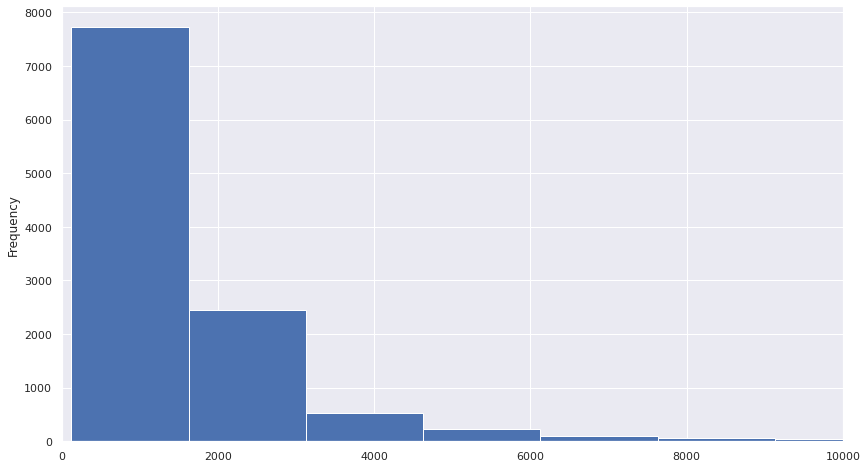

In [49]:
plt.figure(figsize=(14,8))
df['length'].plot(bins=50,kind='hist')
plt.xlim(0,10000)

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
import string
from nltk.corpus import stopwords

In [52]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [53]:
df['tokenized_text'] = df['text'].apply(text_process)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(df['tokenized_text'])

In [67]:
X

<11314x13934 sparse matrix of type '<class 'numpy.float64'>'
	with 1040090 stored elements in Compressed Sparse Row format>

In [56]:
X.toarray()[4560]

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
print(vectorizer.get_feature_names())

['00', '000', '000000', '0002', '002', '008', '01', '010', '0111', '02', '02115', '02139', '02238', '03', '030', '04', '040', '0400', '040000', '040007', '05', '0500', '06', '060', '0600', '07', '0700', '08', '09', '10', '100', '1000', '10000', '100000', '1000000', '101', '1010', '1012', '1015', '10162ef221', '102', '1020', '1024', '1024x768', '1024x768x256', '1025', '103', '1030', '1034', '104', '105', '106', '1066', '1069', '107', '108', '109', '10k', '10th', '11', '110', '1100', '111', '112', '113', '114', '115', '116', '117', '118', '119', '11th', '12', '120', '1200', '1207', '120vac', '121', '1213', '122', '123', '124', '125', '126', '127', '127001', '128', '1280', '1280x1024', '129', '1298974', '12mb', '12v', '13', '130', '1300', '13000', '131', '1312', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '1400', '14022011', '141', '142', '143', '1430', '144', '14400', '14412411230', '144k', '145', '146', '146580', '147', '148', '14853', '149', '14b1', '14th', '15

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
len((vectorizer.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


13934

In [62]:
X.toarray().shape

(11314, 13934)

In [75]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [63]:
X.toarray()[1000]

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0024031790884834017
For n_clusters = 3, silhouette score is 0.002774348380450897
For n_clusters = 4, silhouette score is 0.002510028306419072
For n_clusters = 5, silhouette score is 0.0031816227052610955
For n_clusters = 6, silhouette score is 0.003890023004806941
For n_clusters = 7, silhouette score is 0.004065922692526125
For n_clusters = 8, silhouette score is 0.004705204494104532
For n_clusters = 9, silhouette score is 0.005635383989025286
For n_clusters = 10, silhouette score is 0.005900178640357054
For n_clusters = 11, silhouette score is 0.005915214410667769
For n_clusters = 12, silhouette score is 0.006857816008959447
For n_clusters = 13, silhouette score is 0.006947307427482267
For n_clusters = 14, silhouette score is 0.0061429378705218024
For n_clusters = 15, silhouette score is 0.007178461675928393


#**Applying Elbow Method on Toxenized text**


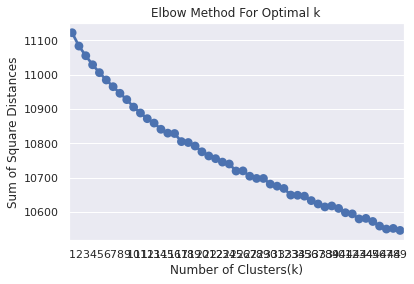

In [74]:
'''features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon'''

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,50):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#**Dendogram to find the optimal number of clusters**

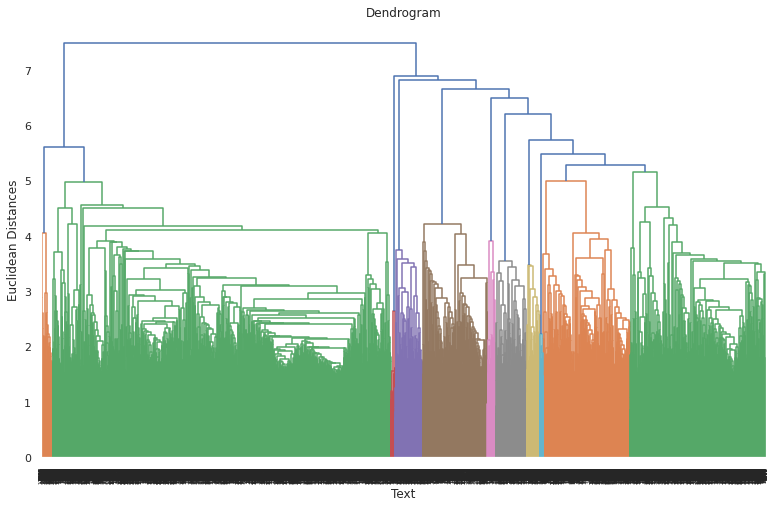

In [84]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X.toarray(), method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Text')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**optimum number of clustering is 9**